<h2>Machine Learning Project</h2>

Mitchell Campbell
<br>Yizhen Chen
<br>Henry Muhlbauer

<br><br><h2>Part I</h2>

<br><h5>Logistic Regression</h5>

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
#Read data file
import pandas as pd
filename_1 = "project3_dataset1.txt"
filename_2 = "project3_dataset2.txt"
with open(filename_1, "r") as file:
    FileContent_1 = file.read()
with open(filename_2, "r") as file:
    FileContent_2 = file.read()

df_1 = pd.read_csv(filename_1, sep="\t", header=None)
df_2 = pd.read_csv(filename_2, sep="\t", header=None)
num_rows_df1 = df_1.shape[0]
num_rows_df2 = df_2.shape[0]

In [37]:
#Normalize the Data

#Import libraries
from sklearn.preprocessing import MinMaxScaler

#Assigning X and Y Values to each dataset
X_1 = df_1.drop(30, axis=1)
y_1 = df_1[30]
X_2 = df_2.drop(9, axis=1)
y_2 = df_2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

#Normalize the data
scaler = MinMaxScaler()
X_1_normalized = scaler.fit_transform(X_1)
X_2_normalized = scaler.fit_transform(X_2)

In [55]:
#Running the Model on data
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
import numpy as np

#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)
penalty_strength_grid_1 = [.01, .1, 1.0, 10, 100]
penalty_strength_grid_2 = [.01, .1, 1.0, 10, 100]
regularization_grid = ["l1", "l2", "none"]
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')
max_iterations = 200

#Numpy Arrays to store results
df_1_logit_results = np.zeros((len(regularization_grid), len(penalty_strength_grid_1), len(scoring)))
df_2_logit_results = np.zeros((len(regularization_grid), len(penalty_strength_grid_2), len(scoring)))
df_1_logit_train = np.zeros((len(regularization_grid), len(penalty_strength_grid_1), len(scoring)))
df_2_logit_train = np.zeros((len(regularization_grid), len(penalty_strength_grid_2), len(scoring)))


#Performance of Logistic Regression on Data Set 1 using different parameters
for i in range(0,len(regularization_grid)):
  regularization = regularization_grid[i]
  if regularization == "l1":
    solver = "saga"
  else:
    solver = "newton-cg"
  for j in range(0,len(penalty_strength_grid_1)):
    penalty_strength = penalty_strength_grid_1[j]
    model = LogisticRegression(penalty=regularization, C=penalty_strength, solver=solver, max_iter=max_iterations)
    cv_results = cross_validate(model, X_1_normalized, y_1, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df_1_logit_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df_1_logit_train[i][j][k] = np.average(cv_results["train_" + criteria])


#Performance of Logistic Regression on Data Set 2 using different parameters
for i in range(0,len(regularization_grid)):
  regularization = regularization_grid[i]
  if regularization == "l1":
    solver = "saga"
  else:
    solver = "newton-cg"
  for j in range(0,len(penalty_strength_grid_2)):
    penalty_strength = penalty_strength_grid_2[j]
    model = LogisticRegression(penalty=regularization, C=penalty_strength, solver=solver, max_iter=max_iterations)
    cv_results = cross_validate(model, X_2_normalized, y_2, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df_2_logit_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df_2_logit_train[i][j][k] = np.average(cv_results["train_" + criteria])

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\mitch\documents\geometry of data\myenv\lib\site

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geo

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
c:\users\mitch\documents\geo

In [60]:
#The purpose of this cell is to get the results into a dataframe

#Dataset 1
df_1_logit = np.transpose(df_1_logit_results, (2,0,1))
df_1_logit_mean = np.mean(df_1_logit, axis=1)                                       #Adding a row for the mean performance across regularization type
row_labels = regularization_grid + ["Mean Performance"]                        #Adding a row for the mean performance across regularization type
df_1_pd = pd.concat([pd.DataFrame(np.vstack((df_1_logit[0],df_1_logit_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_logit[1],df_1_logit_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_logit[2],df_1_logit_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_logit[3],df_1_logit_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df_1_logit[4],df_1_logit_mean[4])), index=row_labels)],
                     keys=scoring)
df_1_pd.columns = penalty_strength_grid_1                                          #Adding a column for the mean performance across penalty strength
df_1_pd['Mean performance'] = df_1_pd.mean(axis=1)                              #Adding a column for the mean performance across penalty strength


#Dataset 2
df_2_logit = np.transpose(df_2_logit_results, (2,0,1))
df_2_logit_mean = np.mean(df_2_logit, axis=1)                                       #Adding a row for the mean performance across regularization type
row_labels = regularization_grid + ["Mean Performance"]                        #Adding a row for the mean performance across regularization type
df_2_pd = pd.concat([pd.DataFrame(np.vstack((df_2_logit[0],df_2_logit_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_logit[1],df_2_logit_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_logit[2],df_2_logit_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_logit[3],df_2_logit_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df_2_logit[4],df_2_logit_mean[4])), index=row_labels)],
                     keys=scoring)
df_2_pd.columns = penalty_strength_grid_2                                          #Adding a column for the mean performance across penalty strength
df_2_pd['Mean performance'] = df_2_pd.mean(axis=1)                              #Adding a column for the mean performance across penalty strength

<AxesSubplot:ylabel='None-None'>

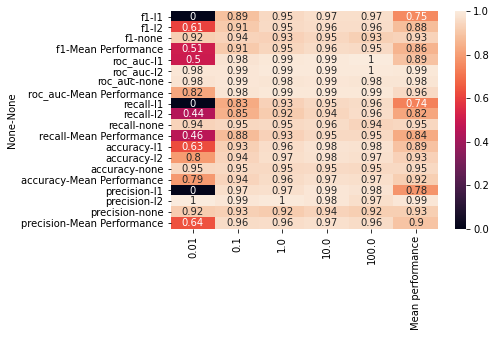

In [61]:
import seaborn as sns
df_1_pd
sns.heatmap(df_1_pd, annot=True)

<AxesSubplot:ylabel='None-None'>

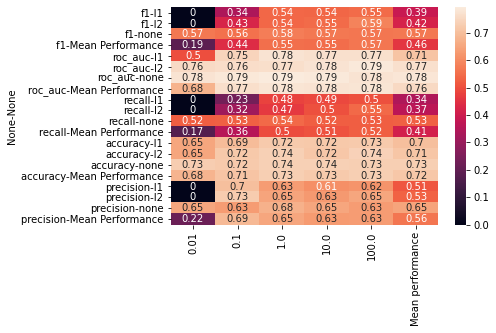

In [62]:
df_2_pd
sns.heatmap(df_2_pd, annot=True)

In [73]:
#Below is for the bias-variance tradeoff. As can be seen the performance on the training data
#tends to be much better than the performance on the testing data.

pd.set_option('display.max_columns', None)                                        #Displays all columns
df1_train_test_diff = df_1_logit_results - df_1_logit_train
df2_train_test_diff = df_2_logit_results - df_2_logit_train

#Dataset 1
df1_err_diff = np.transpose(df1_train_test_diff, (2,0,1))
df1_mean_err = np.mean(df1_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = regularization_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df1_err_pd = pd.concat([pd.DataFrame(np.vstack((df1_err_diff[0],df1_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[1],df1_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[2],df1_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[3],df1_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_err_diff[4],df1_mean_err[4])), index=row_labels)],
                     keys=scoring)
df1_err_pd.columns = penalty_strength_grid_1                                          #Adding a column for the mean difference in error across Neighbor Size
df1_err_pd["Mean Difference in Error"] = df1_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size


#Dataset 2
df2_err_diff = np.transpose(df2_train_test_diff, (2,0,1))
df2_mean_err = np.mean(df2_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = regularization_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df2_err_pd = pd.concat([pd.DataFrame(np.vstack((df2_err_diff[0],df2_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[1],df2_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[2],df2_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[3],df2_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_err_diff[4],df2_mean_err[4])), index=row_labels)],
                     keys=scoring)
df2_err_pd.columns = penalty_strength_grid_2                                          #Adding a column for the mean difference in error across Neighbor Size
df2_err_pd["Mean Difference in Error"] = df2_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size

df1_err_pd.T.loc[df1_err_pd.columns, (scoring,["l1","l2","none"])]

f1                       roc_auc            \
                                l1        l2      none        l1        l2   
0.01                      0.000000 -0.013121 -0.075369  0.000000 -0.000534   
0.1                      -0.009173 -0.002621 -0.064914  0.000760 -0.001781   
1.0                      -0.007841 -0.006844 -0.067851 -0.001195 -0.000829   
10.0                     -0.014773 -0.011801 -0.053348 -0.002913 -0.003251   
100.0                    -0.014949 -0.020123 -0.070511 -0.001036 -0.001878   
Mean Difference in Error -0.009347 -0.010902 -0.066399 -0.000877 -0.001654   

                                      recall                      accuracy  \
                              none        l1        l2      none        l1   
0.01                     -0.020120  0.000000 -0.005823 -0.063977 -0.000128   
0.1                      -0.013733 -0.004715  0.002425 -0.053651 -0.003706   
1.0                      -0.016503 -0.004940 -0.011847 -0.048841 -0.005795   
10.0                     -0.014829 -0.023487 -0.016201 -0.039696 -0.009755   
100.0                    -0.017626 -0.016073 -0.015193 -0.061720 -0.011900   
Mean Difference in Error -0.016562 -0.009843 -0.009328 -0.053577 -0.006257   

                                             precision                      
                                l2      none        l1        l2      none  
0.01                      0.000824 -0.052694  0.000000  0.000000 -0.082388  
0.1                      -0.002977 -0.049217 -0.002712 -0.007468 -0.071704  
1.0                      -0.005081 -0.049248 -0.009188  0.001376 -0.082114  
10.0                     -0.006690 -0.045833 -0.004754 -0.006377 -0.063312  
100.0                    -0.016190 -0.049311 -0.011185 -0.023351 -0.075083  
Mean Difference in Error -0.006023 -0.049261 -0.005568 -0.007164 -0.074920

In [74]:
df2_err_pd.T.loc[df2_err_pd.columns, (scoring,["l1","l2","none"])]

f1                       roc_auc            \
                                l1        l2      none        l1        l2   
0.01                      0.000000  0.000000 -0.011106  0.000000 -0.001184   
0.1                      -0.003594 -0.020292 -0.029850 -0.006573 -0.008718   
1.0                      -0.045420 -0.037320 -0.001986 -0.018146 -0.025820   
10.0                     -0.052499 -0.043147 -0.015555 -0.026777 -0.021092   
100.0                    -0.036359  0.003333 -0.019993 -0.025238 -0.006985   
Mean Difference in Error -0.027574 -0.019485 -0.015698 -0.015346 -0.012760   

                                      recall                      accuracy  \
                              none        l1        l2      none        l1   
0.01                     -0.019106  0.000000  0.000000 -0.000617 -0.000071   
0.1                      -0.008762 -0.001648 -0.007979 -0.008217 -0.003586   
1.0                      -0.002591 -0.038324 -0.039864  0.015311 -0.022315   
10.0                     -0.008029 -0.046463 -0.032011 -0.006351 -0.021505   
100.0                    -0.020501 -0.028471  0.017040 -0.008181 -0.013744   
Mean Difference in Error -0.011798 -0.022981 -0.012563 -0.001611 -0.012244   

                                             precision                      
                                l2      none        l1        l2      none  
0.01                     -0.000071 -0.004435  0.000000  0.000000  0.006214  
0.1                      -0.004304 -0.015543  0.026402 -0.008912 -0.012810  
1.0                      -0.007941 -0.000430 -0.034958 -0.022163  0.030123  
10.0                     -0.022836 -0.002337 -0.046332 -0.026865  0.002964  
100.0                     0.002421 -0.005731 -0.031864  0.001045 -0.019105  
Mean Difference in Error -0.006546 -0.005695 -0.017350 -0.011379  0.001477

<br><h5>K Nearest Neighbor</h5>

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [99]:
#Read data file
import pandas as pd
filename_1 = "project3_dataset1.txt"
filename_2 = "project3_dataset2.txt"
with open(filename_1, "r") as file:
    FileContent_1 = file.read()
with open(filename_2, "r") as file:
    FileContent_2 = file.read()

df_1 = pd.read_csv(filename_1, sep="\t", header=None)
df_2 = pd.read_csv(filename_2, sep="\t", header=None)
num_rows_df1 = df_1.shape[0]
num_rows_df2 = df_2.shape[0]

In [100]:
#Normalize the Data

#Import libraries
from sklearn.preprocessing import MinMaxScaler

#Assigning X and Y Values to each dataset
X_1 = df_1.drop(30, axis=1)
y_1 = df_1[30]
X_2 = df_2.drop(9, axis=1)
y_2 = df_2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

#Normalize the data
scaler = MinMaxScaler()
X_1_normalized = scaler.fit_transform(X_1)
X_2_normalized = scaler.fit_transform(X_2)

In [101]:
#Running the Model on data
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)
neighbor_size_grid_1 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df1), round(0.3 * num_rows_df1)]
neighbor_size_grid_2 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df2), round(0.3 * num_rows_df2)]
distance_metric_grid = ["euclidean", "manhattan", "chebyshev", "minkowski"]
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')


#Numpy Arrays to store results
df_1_KNN_results = np.zeros((len(distance_metric_grid), len(neighbor_size_grid_1), len(scoring)))
df_2_KNN_results = np.zeros((len(distance_metric_grid), len(neighbor_size_grid_2), len(scoring)))
df_1_KNN_train = np.zeros((len(distance_metric_grid), len(neighbor_size_grid_1), len(scoring)))
df_2_KNN_train = np.zeros((len(distance_metric_grid), len(neighbor_size_grid_2), len(scoring)))


#Performance of KNN on Data Set 1 using different parameters
for i in range(0,len(distance_metric_grid)):
  metric = distance_metric_grid[i]
  for j in range(0,len(neighbor_size_grid_1)):
    number_of_neighbors = neighbor_size_grid_1[j]
    model = KNeighborsClassifier(n_neighbors=number_of_neighbors, metric=metric)
    cv_results = cross_validate(model, X_1_normalized, y_1, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df_1_KNN_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df_1_KNN_train[i][j][k] = np.average(cv_results["train_" + criteria])


#Performance of KNN on Data Set 2 using different parameters
for i in range(0,len(distance_metric_grid)):
  metric = distance_metric_grid[i]
  for j in range(0,len(neighbor_size_grid_2)):
    number_of_neighbors = neighbor_size_grid_2[j]
    model = KNeighborsClassifier(n_neighbors=number_of_neighbors, metric=metric)
    cv_results = cross_validate(model, X_2_normalized, y_2, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df_2_KNN_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df_2_KNN_train[i][j][k] = np.average(cv_results["train_" + criteria])

In [102]:
#The purpose of this cell is to get the results into a dataframe

#Dataset 1
df_1_KNN = np.transpose(df_1_KNN_results, (2,0,1))
df_1_KNN_mean = np.mean(df_1_KNN, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = distance_metric_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_1_pd = pd.concat([pd.DataFrame(np.vstack((df_1_KNN[0],df_1_KNN_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_KNN[1],df_1_KNN_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_KNN[2],df_1_KNN_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_1_KNN[3],df_1_KNN_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df_1_KNN[4],df_1_KNN_mean[4])), index=row_labels)],
                     keys=scoring)
df_1_pd.columns = neighbor_size_grid_1                                          #Adding a column for the mean performance across Neighbor Size
df_1_pd['Mean performance'] = df_1_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size


#Dataset 2
df_2_KNN = np.transpose(df_2_KNN_results, (2,0,1))
df_2_KNN_mean = np.mean(df_2_KNN, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = distance_metric_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_2_pd = pd.concat([pd.DataFrame(np.vstack((df_2_KNN[0],df_2_KNN_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_KNN[1],df_2_KNN_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_KNN[2],df_2_KNN_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df_2_KNN[3],df_2_KNN_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df_2_KNN[4],df_2_KNN_mean[4])), index=row_labels)],
                     keys=scoring)
df_2_pd.columns = neighbor_size_grid_2                                          #Adding a column for the mean performance across Neighbor Size
df_2_pd['Mean performance'] = df_2_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size


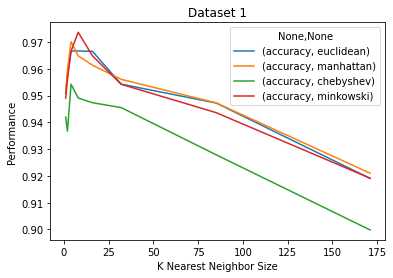

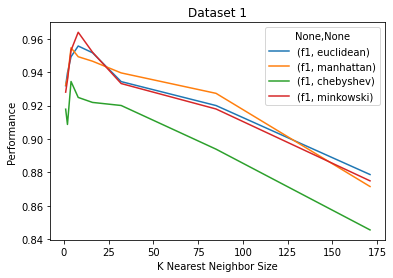

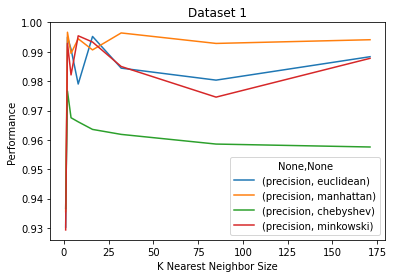

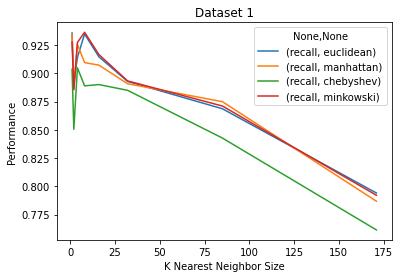

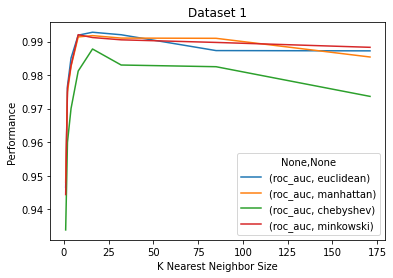

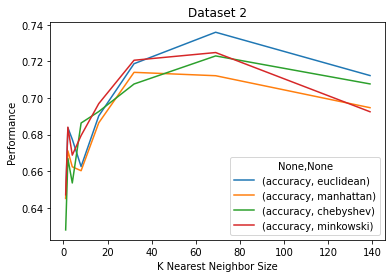

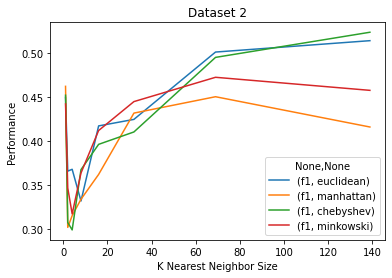

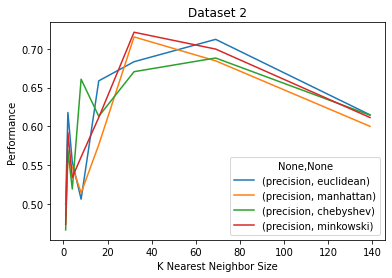

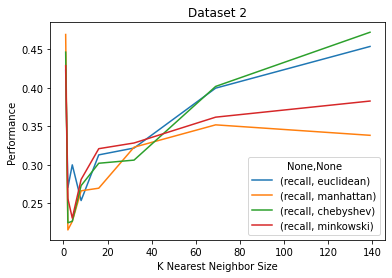

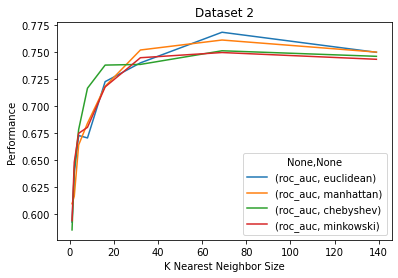

In [103]:
#Performance Plots with respect to different hyperparameters
import matplotlib.pyplot as plt
plt.close('all')


#Dataset 1 Performance Plots
for i in df_1_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="K Nearest Neighbor Size", ylabel="Performance", title="Dataset 1");

#Dataset 2 Performance Plots
for i in df_2_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="K Nearest Neighbor Size", ylabel="Performance", title="Dataset 2");

In [104]:
#Below is for the bias-variance tradeoff. As can be seen the performance on the training data
#tends to be much better than the performance on the testing data.

pd.set_option('display.max_columns', None)                                        #Displays all columns
df1_train_test_diff = df_1_KNN_results - df_1_KNN_train
df2_train_test_diff = df_2_KNN_results - df_2_KNN_train

#Dataset 1
df1_err_diff = np.transpose(df1_train_test_diff, (2,0,1))
df1_mean_err = np.mean(df1_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = distance_metric_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df1_err_pd = pd.concat([pd.DataFrame(np.vstack((df1_err_diff[0],df1_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[1],df1_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[2],df1_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[3],df1_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_err_diff[4],df1_mean_err[4])), index=row_labels)],
                     keys=scoring)
df1_err_pd.columns = neighbor_size_grid_1                                          #Adding a column for the mean difference in error across Neighbor Size
df1_err_pd["Mean Difference in Error"] = df1_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size


#Dataset 2
df2_err_diff = np.transpose(df2_train_test_diff, (2,0,1))
df2_mean_err = np.mean(df2_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = distance_metric_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df2_err_pd = pd.concat([pd.DataFrame(np.vstack((df2_err_diff[0],df2_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[1],df2_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[2],df2_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[3],df2_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_err_diff[4],df2_mean_err[4])), index=row_labels)],
                     keys=scoring)
df2_err_pd.columns = neighbor_size_grid_2                                          #Adding a column for the mean difference in error across Neighbor Size
df2_err_pd["Mean Difference in Error"] = df2_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size

df1_err_pd.loc[(scoring,"Mean Difference in Error"), df1_err_pd.columns].head()

,,1,2,4,8,16,32,85,171,Mean Difference in Error
f1,Mean Difference in Error,-0.072497,-0.034393,-0.016709,-0.013130,-0.008795,-0.004203,-0.005125,-0.006866,-0.020215
roc_auc,Mean Difference in Error,-0.056797,-0.026779,-0.017494,-0.007295,-0.003647,-0.002809,-0.000676,-0.001558,-0.014632
recall,Mean Difference in Error,-0.074609,-0.052711,-0.016055,-0.019039,-0.009863,-0.002866,-0.002165,-0.003600,-0.022614
accuracy,Mean Difference in Error,-0.051825,-0.021865,-0.010031,-0.008511,-0.005435,-0.001979,-0.002333,-0.001303,-0.012910
precision,Mean Difference in Error,-0.067026,-0.009711,-0.014535,-0.004215,-0.003656,-0.001027,-0.003882,-0.002162,-0.013277


In [105]:
df2_err_pd.loc[(scoring,"Mean Difference in Error"), df2_err_pd.columns].head()

,,1,2,4,8,16,32,69,139,Mean Difference in Error
f1,Mean Difference in Error,-0.548302,-0.274093,-0.242489,-0.141665,-0.076682,-0.055571,-0.014065,-0.035821,-0.173586
roc_auc,Mean Difference in Error,-0.404854,-0.292852,-0.201065,-0.126587,-0.066599,-0.042563,-0.014443,0.002561,-0.143300
recall,Mean Difference in Error,-0.558151,-0.192230,-0.181975,-0.095826,-0.050287,-0.042614,-0.001470,-0.018755,-0.142664
accuracy,Mean Difference in Error,-0.358661,-0.127487,-0.109575,-0.067239,-0.038765,-0.017790,-0.008522,-0.020513,-0.093569
precision,Mean Difference in Error,-0.518848,-0.415905,-0.308655,-0.197048,-0.115623,-0.033869,-0.017023,-0.040014,-0.205873


<br><h5>Support Vector Machines</h5>

In [78]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [79]:
# read data file
import pandas as pd
filename1 = "project3_dataset1.txt"
filename2 = "project3_dataset2.txt"
# with open(filename1, "r") as file:
#     FileContent = file.read()

df1 = pd.read_csv(filename1, sep="\t", header=None)
num_rows_df1 = df1.shape[0]
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


In [80]:
df2 = pd.read_csv(filename2, sep="\t", header=None)
num_rows_df2 = df2.shape[0]
df2.head()

,0,1,2,3,4,5,6,7,8,9
0,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
1,123,0.05,4.61,13.69,Absent,51,23.23,2.78,16,0
2,128,0.50,3.70,12.81,Present,66,21.25,22.73,28,0
3,114,9.60,2.51,29.18,Absent,49,25.67,40.63,46,0
4,150,0.30,6.38,33.99,Present,62,24.64,0.00,50,0


In [81]:
#Normalize the Data

#Import libraries
from sklearn.preprocessing import MinMaxScaler

#Assigning X and Y Values to each dataset
X_1 = df1.drop(30, axis=1)
y_1 = df1[30]
X_2 = df2.drop(9, axis=1)
y_2 = df2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

#Normalize the data
scaler = MinMaxScaler()
X_1_normalized = scaler.fit_transform(X_1)
X_2_normalized = scaler.fit_transform(X_2)

In [88]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np

#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
cv = KFold(n_splits=n_splits, shuffle=True)
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')
best_svr = svm.SVC(kernel='rbf')


In [91]:
# Dataset 1
df1_train = {}
df1_test = {}
scores = cross_validate(best_svr, X_1_normalized, y_1, cv=cv, scoring=scoring, return_train_score=True)
for k in range(0, len(scoring)):
      criteria = scoring[k]
      df1_train[criteria] = np.average(scores["train_" + criteria])
      df1_test[criteria] = np.average(scores["test_" + criteria])
      print(criteria, np.average(scores["test_" + criteria]))

f1 0.9668016679367637
roc_auc 0.9945425887593476
recall 0.9594472964019245
accuracy 0.9754385964912281
precision 0.9763257575757576


In [92]:
# Dataset 2
# Dataset 1
df2_train = {}
df2_test = {}
scores = cross_validate(best_svr, X_2_normalized, y_2, cv=cv, scoring=scoring, return_train_score=True)
for k in range(0, len(scoring)):
      criteria = scoring[k]
      df2_train[criteria] = np.average(scores["train_" + criteria])
      df2_test[criteria] = np.average(scores["test_" + criteria])
      print(criteria, np.average(scores["test_" + criteria]))

f1 0.5178353771832034
roc_auc 0.7668230605179135
recall 0.4387414056531703
accuracy 0.7339037927844588
precision 0.6633189033189033


In [93]:
scores = []
for train_index, test_index in cv.split(X_1_normalized):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X_1_normalized[train_index], X_1_normalized[test_index], y_1[train_index], y_1[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [  0   2   3   4   5   6   7   8  10  11  12  14  15  16  17  18  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57  59  60
  61  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  89  90  91  92  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 129 130 131 132 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 177 178 179 180 181 184 186 187 188 189 191 192 193 195 196 198 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 220 221 222 223 224 226 227 228 229 230 231 232 233 234 235 236 237 239
 240 243 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 261
 262 263 264 265 266 267 268 269 270 

Train Index:  [  0   1   2   3   4   5   6   8   9  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  28  29  32  33  34  35  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  53  54  55  56  58  59  60  62
  63  64  65  66  67  68  69  71  72  73  74  75  76  77  78  79  80  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 116 117 118 119
 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135 137 138 139
 140 141 142 143 144 145 146 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 173 174 175 176 177
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 216
 217 218 219 220 221 222 223 224 225 226 227 228 230 231 233 234 235 236
 237 238 239 240 241 242 243 244 246 247 248 249 251 252 253 254 255 256
 257 258 260 261 262 264 265 266 267 

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18
  19  21  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39
  40  41  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  77
  78  79  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  99
 100 101 103 104 105 106 107 109 110 111 112 113 115 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 150 151 152 153 154 155 157 158 159 160
 161 162 163 164 166 167 168 169 170 171 172 173 174 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 209 211 212 213 214 215 216 217 218 219
 220 221 222 224 225 226 227 229 230 231 232 233 234 235 236 237 238 239
 241 242 243 244 245 246 248 250 251 252 254 255 256 257 258 259 260 261
 262 263 264 266 267 269 270 271 272 

In [94]:
cross_val_score(best_svr, X_1_normalized, y_1, cv=10)

array([0.98245614, 0.98245614, 0.98245614, 0.96491228, 0.98245614,
       0.98245614, 0.96491228, 0.96491228, 0.98245614, 0.98214286])

In [95]:
cross_val_predict(best_svr, X_1_normalized, y_1, cv=10)

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [96]:
#Below is for the bias-variance tradeoff.
err_diff_1 = []
for k in range(0, len(scoring)):
  criteria = scoring[k]
  err_diff_1.append(df1_test[criteria] - df1_train[criteria])

err_diff_2 = []
for k in range(0, len(scoring)):
  criteria = scoring[k]
  err_diff_2.append(df2_test[criteria] - df2_train[criteria])


df1_diff = pd.DataFrame(np.array(err_diff_1), index=scoring,
                   columns=['Mean Difference in Error'])
df1_diff.head()

,Mean Difference in Error
f1,-0.008703
roc_auc,-0.002277
recall,-0.000214
accuracy,-0.006597
precision,-0.015568


In [97]:
df2_diff = pd.DataFrame(np.array(err_diff_2), index=scoring,
                   columns=['Mean Difference in Error'])
df2_diff.head()

,Mean Difference in Error
f1,-0.064944
roc_auc,-0.048629
recall,-0.047657
accuracy,-0.025599
precision,-0.065196


<br><h5>Decision Tree</h5>

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
#Read data file
import pandas as pd
filename_1 = "project3_dataset1.txt"
filename_2 = "project3_dataset2.txt"
with open(filename_1, "r") as file:
    FileContent_1 = file.read()
with open(filename_2, "r") as file:
    FileContent_2 = file.read()

df_1 = pd.read_csv(filename_1, sep="\t", header=None)
df_2 = pd.read_csv(filename_2, sep="\t", header=None)
num_rows_df1 = df_1.shape[0]
num_rows_df2 = df_2.shape[0]

In [11]:
#Preprocessing Data

#Assigning X and Y Values to each dataset
X_1 = df_1.drop(30, axis=1)
y_1 = df_1[30]
X_2 = df_2.drop(9, axis=1)
y_2 = df_2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

In [12]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np


#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)
min_samples_leaf_grid_1 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df1), round(0.3 * num_rows_df1)]
min_samples_leaf_grid_2 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df2), round(0.3 * num_rows_df2)]
max_depth_grid = [1, 2, 4, 8, 16, 32, 64]
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')


#Numpy Arrays to store results
df1_tree_results = np.zeros((len(max_depth_grid), len(min_samples_leaf_grid_1), len(scoring)))
df2_tree_results = np.zeros((len(max_depth_grid), len(min_samples_leaf_grid_2), len(scoring)))
df1_tree_train = np.zeros((len(max_depth_grid), len(min_samples_leaf_grid_1), len(scoring)))
df2_tree_train = np.zeros((len(max_depth_grid), len(min_samples_leaf_grid_2), len(scoring)))


#Performance of decision tree on Data Set 1 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(min_samples_leaf_grid_1)):
    minSamples = min_samples_leaf_grid_1[j]
    model = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    cv_results = cross_validate(model, X_1, y_1, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df1_tree_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df1_tree_train[i][j][k] = np.average(cv_results["train_" + criteria])


#Performance of decision tree on Data Set 2 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(min_samples_leaf_grid_2)):
    minSamples = min_samples_leaf_grid_2[j]
    model = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    cv_results = cross_validate(model, X_2, y_2, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df2_tree_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df2_tree_train[i][j][k] = np.average(cv_results["train_" + criteria])

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

In [13]:
#The purpose of this cell is to get the results into a dataframe

#Dataset 1
df1_tree = np.transpose(df1_tree_results, (2,0,1))
df1_tree_mean = np.mean(df1_tree, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_1_pd = pd.concat([pd.DataFrame(np.vstack((df1_tree[0],df1_tree_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_tree[1],df1_tree_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_tree[2],df1_tree_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_tree[3],df1_tree_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_tree[4],df1_tree_mean[4])), index=row_labels)],
                     keys=scoring)
df_1_pd.columns = min_samples_leaf_grid_1                                          #Adding a column for the mean performance across Neighbor Size
df_1_pd['Mean performance'] = df_1_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size


#Dataset 2
df2_tree = np.transpose(df2_tree_results, (2,0,1))
df2_tree_mean = np.mean(df2_tree, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_2_pd = pd.concat([pd.DataFrame(np.vstack((df2_tree[0],df2_tree_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_tree[1],df2_tree_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_tree[2],df2_tree_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_tree[3],df2_tree_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_tree[4],df2_tree_mean[4])), index=row_labels)],
                     keys=scoring)
df_2_pd.columns = min_samples_leaf_grid_2                                          #Adding a column for the mean performance across Neighbor Size
df_2_pd['Mean performance'] = df_2_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size

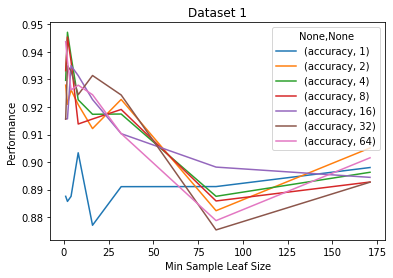

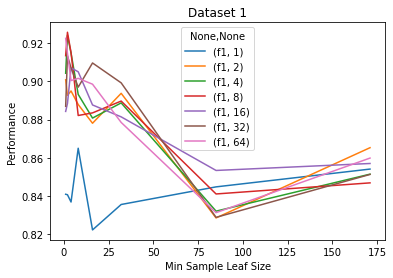

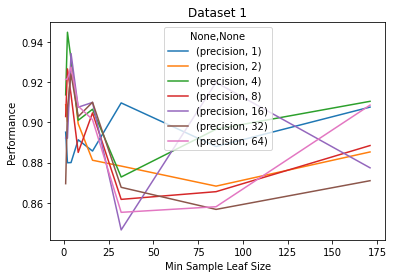

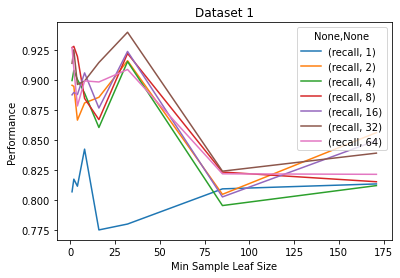

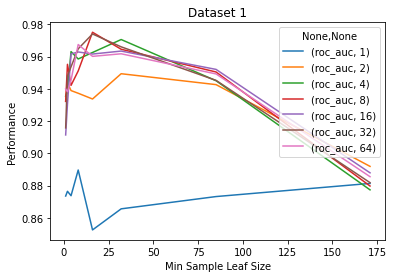

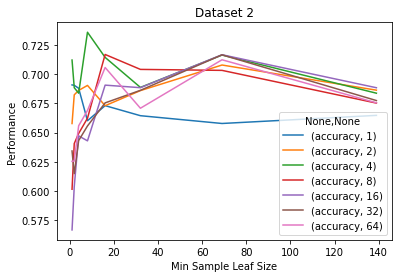

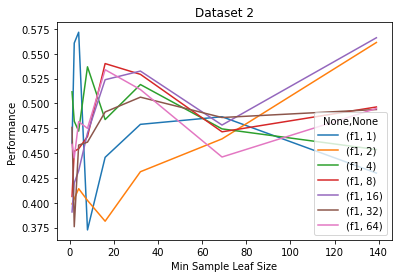

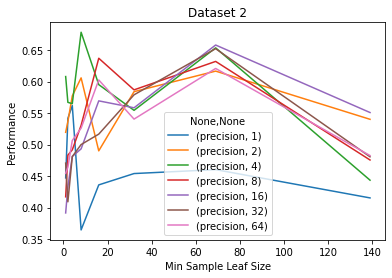

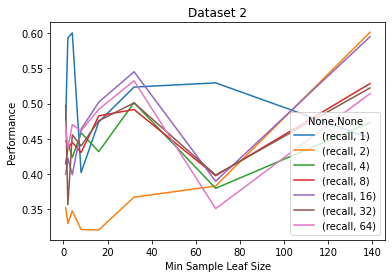

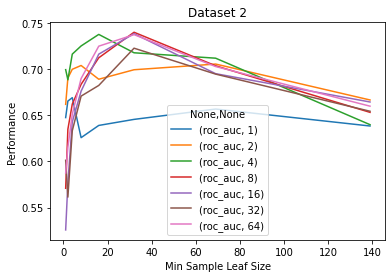

In [14]:
#Performance Plots with respect to different hyperparameters
import matplotlib.pyplot as plt
plt.close('all')


#Dataset 1 Performance Plots
for i in df_1_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Min Sample Leaf Size", ylabel="Performance", title="Dataset 1");

#Dataset 2 Performance Plots
for i in df_2_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Min Sample Leaf Size", ylabel="Performance", title="Dataset 2");

In [15]:
#Below is for the bias-variance tradeoff. As can be seen the performance on the training data
#tends to be much better than the performance on the testing data.

pd.set_option('display.max_columns', None)                                        #Displays all columns
df1_train_test_diff = df1_tree_results - df1_tree_train
df2_train_test_diff = df2_tree_results - df2_tree_train

#Dataset 1
df1_err_diff = np.transpose(df1_train_test_diff, (2,0,1))
df1_mean_err = np.mean(df1_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df1_err_pd = pd.concat([pd.DataFrame(np.vstack((df1_err_diff[0],df1_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[1],df1_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[2],df1_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[3],df1_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_err_diff[4],df1_mean_err[4])), index=row_labels)],
                     keys=scoring)
df1_err_pd.columns = min_samples_leaf_grid_1                                          #Adding a column for the mean difference in error across Neighbor Size
df1_err_pd["Mean Difference in Error"] = df1_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size


#Dataset 2
df2_err_diff = np.transpose(df2_train_test_diff, (2,0,1))
df2_mean_err = np.mean(df2_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df2_err_pd = pd.concat([pd.DataFrame(np.vstack((df2_err_diff[0],df2_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[1],df2_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[2],df2_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[3],df2_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_err_diff[4],df2_mean_err[4])), index=row_labels)],
                     keys=scoring)
df2_err_pd.columns = min_samples_leaf_grid_2                                         #Adding a column for the mean difference in error across Neighbor Size
df2_err_pd["Mean Difference in Error"] = df2_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size

df1_err_pd.loc[(scoring,"Mean Difference in Error"), df1_err_pd.columns].head()

,,1,2,4,8,16,32,85,171,Mean Difference in Error
f1,Mean Difference in Error,-0.079521,-0.064658,-0.059520,-0.053775,-0.050647,-0.035795,-0.056511,-0.038627,-0.054882
roc_auc,Mean Difference in Error,-0.060665,-0.048484,-0.040909,-0.032228,-0.031919,-0.024838,-0.024665,-0.029949,-0.036707
recall,Mean Difference in Error,-0.069529,-0.054795,-0.058461,-0.048871,-0.050905,-0.035070,-0.051738,-0.045003,-0.051797
accuracy,Mean Difference in Error,-0.058468,-0.047554,-0.041961,-0.038239,-0.034719,-0.023553,-0.038007,-0.025367,-0.038484
precision,Mean Difference in Error,-0.082637,-0.069061,-0.054513,-0.055144,-0.043850,-0.032162,-0.049967,-0.023479,-0.051352


In [16]:
df2_err_pd.loc[(scoring,"Mean Difference in Error"), df2_err_pd.columns].head()

,,1,2,4,8,16,32,69,139,Mean Difference in Error
f1,Mean Difference in Error,-0.349107,-0.311686,-0.251631,-0.183749,-0.118181,-0.083308,-0.042312,-0.023952,-0.170491
roc_auc,Mean Difference in Error,-0.277827,-0.253715,-0.206058,-0.163918,-0.111416,-0.065051,-0.051229,-0.021761,-0.143872
recall,Mean Difference in Error,-0.331867,-0.279495,-0.225142,-0.165165,-0.099399,-0.066614,-0.028346,-0.020942,-0.152121
accuracy,Mean Difference in Error,-0.235063,-0.200830,-0.159124,-0.113087,-0.068707,-0.052187,-0.020451,-0.013980,-0.107929
precision,Mean Difference in Error,-0.358687,-0.345607,-0.268171,-0.186489,-0.136458,-0.086254,-0.047725,-0.017667,-0.180882


[Text(468.72, 684.9359999999999, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(312.48, 532.728, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]'),
 Text(234.36, 380.52, 'X[13] <= 31.2\ngini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(156.24, 228.312, 'X[21] <= 30.145\ngini = 0.013\nsamples = 301\nvalue = [299, 2]'),
 Text(78.12, 76.10399999999993, 'gini = 0.0\nsamples = 259\nvalue = [259, 0]'),
 Text(234.36, 76.10399999999993, 'gini = 0.091\nsamples = 42\nvalue = [40, 2]'),
 Text(312.48, 228.312, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(390.6, 380.52, 'gini = 0.476\nsamples = 46\nvalue = [18, 28]'),
 Text(624.96, 532.728, 'X[27] <= 0.145\ngini = 0.109\nsamples = 190\nvalue = [11, 179]'),
 Text(546.84, 380.52, 'gini = 0.411\nsamples = 38\nvalue = [11, 27]'),
 Text(703.08, 380.52, 'gini = 0.0\nsamples = 152\nvalue = [0, 152]')]

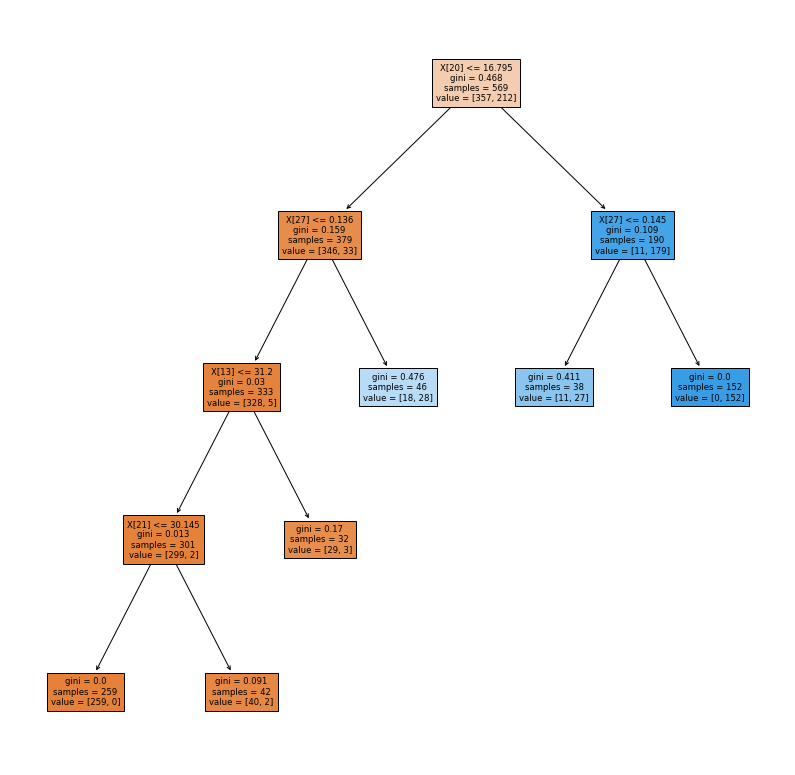

In [17]:
#Plotting the best trees for each dataset in our opinion
from sklearn import tree

#Best Model 1 Tree
model_1 = DecisionTreeClassifier(max_depth=64, min_samples_leaf=32)
model_1 = model_1.fit(X_1, y_1)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(model_1, filled=True, fontsize=8.5) 

[Text(421.43684210526317, 684.9359999999999, 'X[8] <= 50.5\ngini = 0.453\nsamples = 462\nvalue = [302, 160]'),
 Text(226.13684210526316, 532.728, 'X[8] <= 30.5\ngini = 0.344\nsamples = 290\nvalue = [226, 64]'),
 Text(123.34736842105264, 380.52, 'X[1] <= 0.36\ngini = 0.137\nsamples = 108\nvalue = [100, 8]'),
 Text(82.23157894736842, 228.312, 'X[6] <= 22.155\ngini = 0.026\nsamples = 76\nvalue = [75, 1]'),
 Text(41.11578947368421, 76.10399999999993, 'gini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(123.34736842105264, 76.10399999999993, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(164.46315789473684, 228.312, 'gini = 0.342\nsamples = 32\nvalue = [25, 7]'),
 Text(328.9263157894737, 380.52, 'X[5] <= 53.5\ngini = 0.426\nsamples = 182\nvalue = [126, 56]'),
 Text(246.69473684210527, 228.312, 'X[7] <= 7.12\ngini = 0.295\nsamples = 78\nvalue = [64, 14]'),
 Text(205.57894736842104, 76.10399999999993, 'gini = 0.422\nsamples = 33\nvalue = [23, 10]'),
 Text(287.81052631578945, 76.10399999

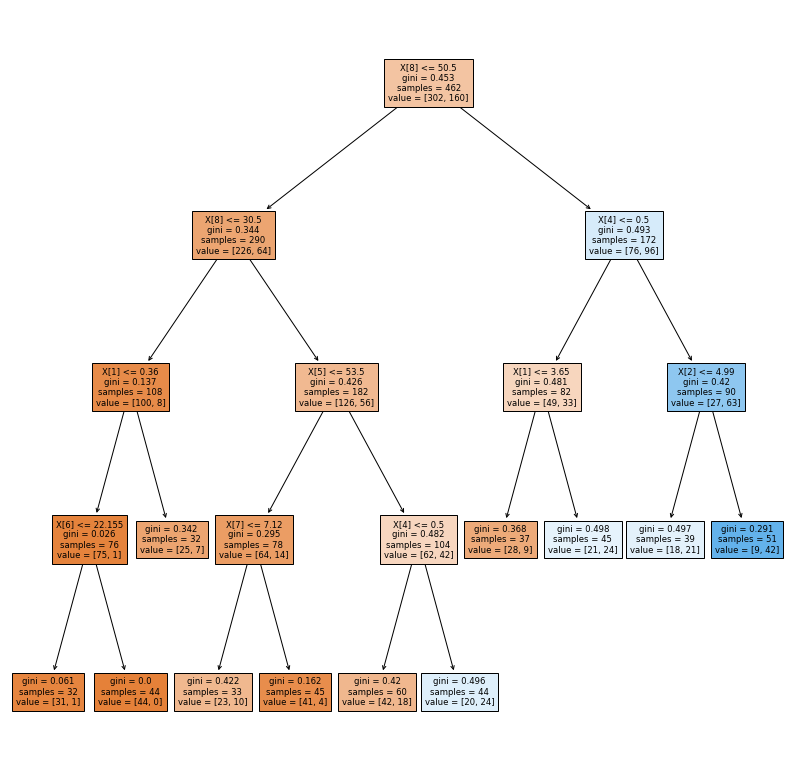

In [18]:

#Best Model 2 Tree
model_2 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=32)
model_2 = model_2.fit(X_2, y_2)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(model_2, filled=True, fontsize=8.5) 

<br><h5>Random Forest</h5>

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
#Read data file
import pandas as pd
filename_1 = "project3_dataset1.txt"
filename_2 = "project3_dataset2.txt"
with open(filename_1, "r") as file:
    FileContent_1 = file.read()
with open(filename_2, "r") as file:
    FileContent_2 = file.read()

df_1 = pd.read_csv(filename_1, sep="\t", header=None)
df_2 = pd.read_csv(filename_2, sep="\t", header=None)
num_rows_df1 = df_1.shape[0]
num_rows_df2 = df_2.shape[0]

In [21]:
#Preprocessing Data

#Assigning X and Y Values to each dataset
X_1 = df_1.drop(30, axis=1)
y_1 = df_1[30]
X_2 = df_2.drop(9, axis=1)
y_2 = df_2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

In [22]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np


#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)
num_estimators_grid_1 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df1), round(0.3 * num_rows_df1)]
num_estimators_grid_2 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df2), round(0.3 * num_rows_df2)]
max_depth_grid = [1, 2, 4, 8, 16, 24, 32, 64]
minSamples = 32     #32 seemed to work well empirically for the decision trees for both datasets - Additionally a larger min sample size results in simpler trees, which is better for ensemble learning methods
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')


#Numpy Arrays to store results
df1_rTree_results = np.zeros((len(max_depth_grid), len(num_estimators_grid_1), len(scoring)))
df2_rTree_results = np.zeros((len(max_depth_grid), len(num_estimators_grid_2), len(scoring)))
df1_rTree_train = np.zeros((len(max_depth_grid), len(num_estimators_grid_1), len(scoring)))
df2_rTree_train = np.zeros((len(max_depth_grid), len(num_estimators_grid_2), len(scoring)))


#Performance of random forest on Data Set 1 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(num_estimators_grid_1)):
    #minSamples = min_samples_leaf_grid_1[j]
    num_estimators = num_estimators_grid_1[j]
    #tree = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    model = RandomForestClassifier(n_estimators=num_estimators, max_depth=maxDepth, min_samples_leaf=minSamples)  #model = AdarTreeClassifier(n_estimators=num_estimators, random_state=0)
    cv_results = cross_validate(model, X_1, y_1, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df1_rTree_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df1_rTree_train[i][j][k] = np.average(cv_results["train_" + criteria])


#Performance of random forest on Data Set 2 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(num_estimators_grid_2)):
    #minSamples = min_samples_leaf_grid_2[j]
    num_estimators = num_estimators_grid_2[j]
    #tree = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    model = RandomForestClassifier(n_estimators=num_estimators, max_depth=maxDepth, min_samples_leaf=minSamples)  #model = AdarTreeClassifier(n_estimators=num_estimators, random_state=0)
    cv_results = cross_validate(model, X_2, y_2, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df2_rTree_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df2_rTree_train[i][j][k] = np.average(cv_results["train_" + criteria])

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\l

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#The purpose of this cell is to get the results into a dataframe

#Dataset 1
df1_rTree = np.transpose(df1_rTree_results, (2,0,1))
df1_rTree_mean = np.mean(df1_rTree, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_1_pd = pd.concat([pd.DataFrame(np.vstack((df1_rTree[0],df1_rTree_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_rTree[1],df1_rTree_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_rTree[2],df1_rTree_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_rTree[3],df1_rTree_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_rTree[4],df1_rTree_mean[4])), index=row_labels)],
                     keys=scoring)
df_1_pd.columns = num_estimators_grid_1                                          #Adding a column for the mean performance across Neighbor Size
df_1_pd['Mean performance'] = df_1_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size


#Dataset 2
df2_rTree = np.transpose(df2_rTree_results, (2,0,1))
df2_rTree_mean = np.mean(df2_rTree, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_2_pd = pd.concat([pd.DataFrame(np.vstack((df2_rTree[0],df2_rTree_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_rTree[1],df2_rTree_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_rTree[2],df2_rTree_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_rTree[3],df2_rTree_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_rTree[4],df2_rTree_mean[4])), index=row_labels)],
                     keys=scoring)
df_2_pd.columns = num_estimators_grid_2                                          #Adding a column for the mean performance across Neighbor Size
df_2_pd['Mean performance'] = df_2_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size

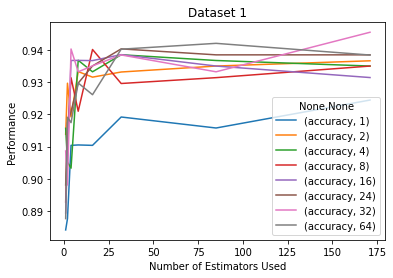

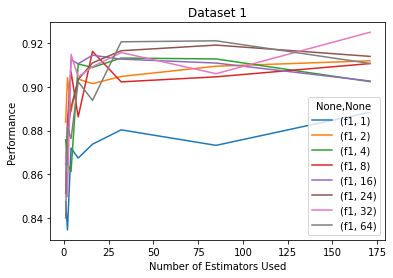

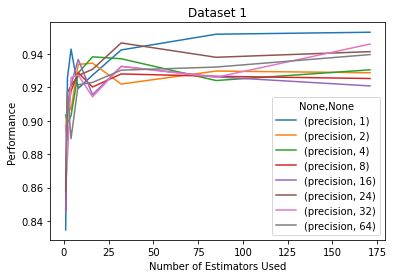

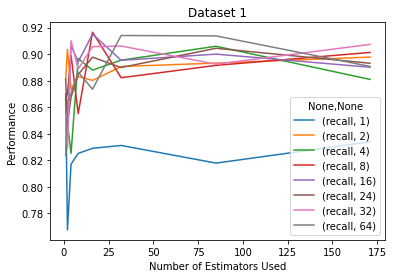

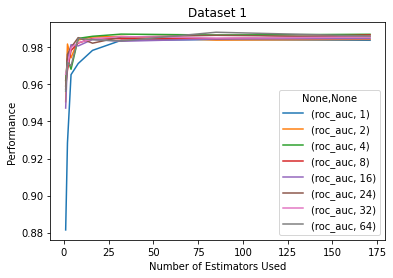

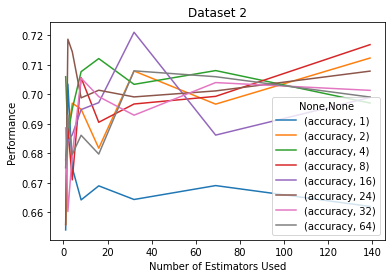

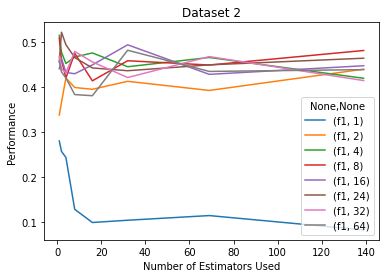

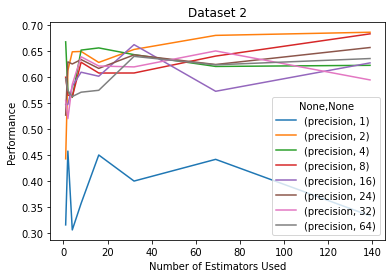

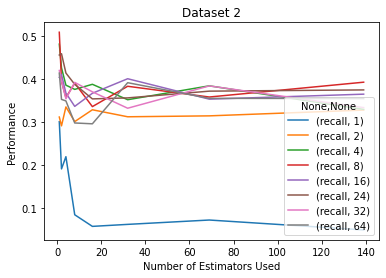

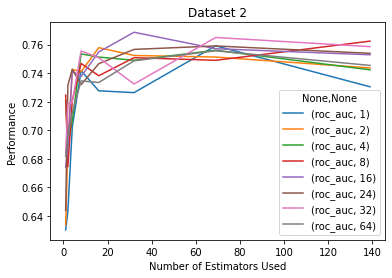

In [24]:
#Performance Plots with respect to different hyperparameters
import matplotlib.pyplot as plt
plt.close('all')


#Dataset 1 Performance Plots
for i in df_1_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Number of Estimators Used", ylabel="Performance", title="Dataset 1");

#Dataset 2 Performance Plots
for i in df_2_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Number of Estimators Used", ylabel="Performance", title="Dataset 2");

In [25]:
#Below is for the bias-variance tradeoff. As can be seen the performance on the training data
#tends to be much better than the performance on the testing data.

pd.set_option('display.max_columns', None)                                        #Displays all columns
df1_train_test_diff = df1_rTree_results - df1_rTree_train
df2_train_test_diff = df2_rTree_results - df2_rTree_train

#Dataset 1
df1_err_diff = np.transpose(df1_train_test_diff, (2,0,1))
df1_mean_err = np.mean(df1_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df1_err_pd = pd.concat([pd.DataFrame(np.vstack((df1_err_diff[0],df1_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[1],df1_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[2],df1_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[3],df1_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_err_diff[4],df1_mean_err[4])), index=row_labels)],
                     keys=scoring)
df1_err_pd.columns = num_estimators_grid_1                                          #Adding a column for the mean difference in error across Neighbor Size
df1_err_pd["Mean Difference in Error"] = df1_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size


#Dataset 2
df2_err_diff = np.transpose(df2_train_test_diff, (2,0,1))
df2_mean_err = np.mean(df2_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df2_err_pd = pd.concat([pd.DataFrame(np.vstack((df2_err_diff[0],df2_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[1],df2_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[2],df2_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[3],df2_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_err_diff[4],df2_mean_err[4])), index=row_labels)],
                     keys=scoring)
df2_err_pd.columns = num_estimators_grid_2                                         #Adding a column for the mean difference in error across Neighbor Size
df2_err_pd["Mean Difference in Error"] = df2_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size

df1_err_pd.loc[(scoring,"Mean Difference in Error"), df1_err_pd.columns].head()

,,1,2,4,8,16,32,85,171,Mean Difference in Error
f1,Mean Difference in Error,-0.017073,-0.025009,-0.023952,-0.023702,-0.023888,-0.020545,-0.024021,-0.023231,-0.022678
roc_auc,Mean Difference in Error,-0.010050,-0.007470,-0.009500,-0.005721,-0.005342,-0.004869,-0.005015,-0.005007,-0.006622
recall,Mean Difference in Error,-0.012157,-0.022039,-0.022499,-0.025175,-0.020305,-0.020814,-0.021743,-0.024922,-0.021207
accuracy,Mean Difference in Error,-0.010441,-0.016239,-0.015392,-0.014631,-0.016164,-0.013463,-0.016416,-0.014454,-0.014650
precision,Mean Difference in Error,-0.018013,-0.021821,-0.021485,-0.016438,-0.022320,-0.016119,-0.020097,-0.016587,-0.019110


In [26]:
df2_err_pd.loc[(scoring,"Mean Difference in Error"), df2_err_pd.columns].head()

,,1,2,4,8,16,32,69,139,Mean Difference in Error
f1,Mean Difference in Error,-0.049545,-0.052926,-0.085246,-0.081663,-0.091280,-0.077551,-0.080429,-0.082475,-0.075140
roc_auc,Mean Difference in Error,-0.038606,-0.062914,-0.058519,-0.055142,-0.061408,-0.060870,-0.054834,-0.063096,-0.056924
recall,Mean Difference in Error,-0.032936,-0.048900,-0.068934,-0.066536,-0.069049,-0.055869,-0.049278,-0.056523,-0.056003
accuracy,Mean Difference in Error,-0.023212,-0.023393,-0.040247,-0.037204,-0.042425,-0.036385,-0.040133,-0.038481,-0.035185
precision,Mean Difference in Error,-0.042057,-0.039555,-0.095235,-0.111221,-0.111475,-0.125494,-0.150810,-0.162492,-0.104792


<br><h5>Boosting</h5>

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [28]:
#Read data file
import pandas as pd
filename_1 = "project3_dataset1.txt"
filename_2 = "project3_dataset2.txt"
with open(filename_1, "r") as file:
    FileContent_1 = file.read()
with open(filename_2, "r") as file:
    FileContent_2 = file.read()

df_1 = pd.read_csv(filename_1, sep="\t", header=None)
df_2 = pd.read_csv(filename_2, sep="\t", header=None)
num_rows_df1 = df_1.shape[0]
num_rows_df2 = df_2.shape[0]

In [29]:
#Preprocessing Data

#Assigning X and Y Values to each dataset
X_1 = df_1.drop(30, axis=1)
y_1 = df_1[30]
X_2 = df_2.drop(9, axis=1)
y_2 = df_2[9]

#Change Catagorical Data to Numerical
X_2[4] = X_2[4].eq('Present').mul(1)

In [30]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
import numpy as np


#Initialize KFold cross validation and hyperparameter grids
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True)
num_estimators_grid_1 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df1), round(0.3 * num_rows_df1)]
num_estimators_grid_2 = [1, 2, 4, 8, 16, 32, round(0.15 * num_rows_df2), round(0.3 * num_rows_df2)]
max_depth_grid = [1, 2, 4, 8, 16, 24, 32, 64]
minSamples = 16     #16 was decided on through trial and error
scoring=('f1', 'roc_auc', 'recall', 'accuracy', 'precision')


#Numpy Arrays to store results
df1_boost_results = np.zeros((len(max_depth_grid), len(num_estimators_grid_1), len(scoring)))
df2_boost_results = np.zeros((len(max_depth_grid), len(num_estimators_grid_2), len(scoring)))
df1_boost_train = np.zeros((len(max_depth_grid), len(num_estimators_grid_1), len(scoring)))
df2_boost_train = np.zeros((len(max_depth_grid), len(num_estimators_grid_2), len(scoring)))


#Performance of Adaboost on Data Set 1 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(num_estimators_grid_1)):
    #minSamples = min_samples_leaf_grid_1[j]
    num_estimators = num_estimators_grid_1[j]
    tree = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    model = AdaBoostClassifier(base_estimator = tree, n_estimators=num_estimators, random_state=0)
    cv_results = cross_validate(model, X_1, y_1, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df1_boost_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df1_boost_train[i][j][k] = np.average(cv_results["train_" + criteria])


#Performance of Adaboost on Data Set 2 using different parameters
for i in range(0,len(max_depth_grid)):
  maxDepth = max_depth_grid[i]
  for j in range(0,len(num_estimators_grid_2)):
    #minSamples = min_samples_leaf_grid_2[j]
    num_estimators = num_estimators_grid_2[j]
    tree = DecisionTreeClassifier(max_depth=maxDepth, min_samples_leaf=minSamples)
    model = AdaBoostClassifier(base_estimator = tree, n_estimators=num_estimators, random_state=0)
    cv_results = cross_validate(model, X_2, y_2, cv=kf, scoring=scoring, return_train_score=True)
    for k in range(0, len(scoring)):
      criteria = scoring[k]
      df2_boost_results[i][j][k] = np.average(cv_results["test_" + criteria])
      df2_boost_train[i][j][k] = np.average(cv_results["train_" + criteria])

c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mitch\documents\geometry of data\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#The purpose of this cell is to get the results into a dataframe

#Dataset 1
df1_boost = np.transpose(df1_boost_results, (2,0,1))
df1_boost_mean = np.mean(df1_boost, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_1_pd = pd.concat([pd.DataFrame(np.vstack((df1_boost[0],df1_boost_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_boost[1],df1_boost_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_boost[2],df1_boost_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_boost[3],df1_boost_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_boost[4],df1_boost_mean[4])), index=row_labels)],
                     keys=scoring)
df_1_pd.columns = num_estimators_grid_1                                          #Adding a column for the mean performance across Neighbor Size
df_1_pd['Mean performance'] = df_1_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size


#Dataset 2
df2_boost = np.transpose(df2_boost_results, (2,0,1))
df2_boost_mean = np.mean(df2_boost, axis=1)                                       #Adding a row for the mean performance across distance metrics
row_labels = max_depth_grid + ["Mean Performance"]                        #Adding a row for the mean performance across distance metrics
df_2_pd = pd.concat([pd.DataFrame(np.vstack((df2_boost[0],df2_boost_mean[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_boost[1],df2_boost_mean[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_boost[2],df2_boost_mean[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_boost[3],df2_boost_mean[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_boost[4],df2_boost_mean[4])), index=row_labels)],
                     keys=scoring)
df_2_pd.columns = num_estimators_grid_2                                          #Adding a column for the mean performance across Neighbor Size
df_2_pd['Mean performance'] = df_2_pd.mean(axis=1)                              #Adding a column for the mean performance across Neighbor Size

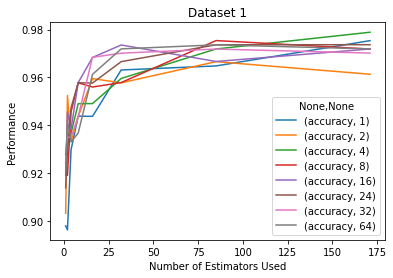

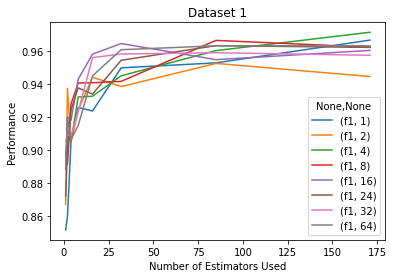

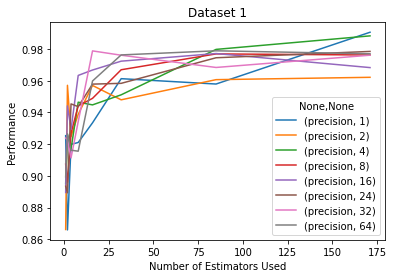

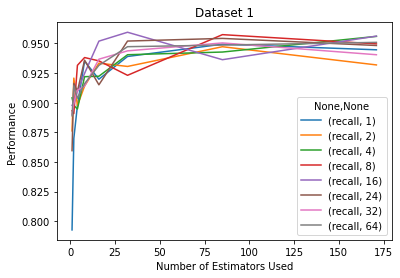

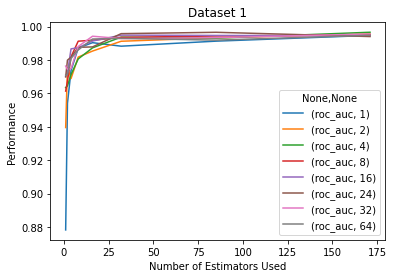

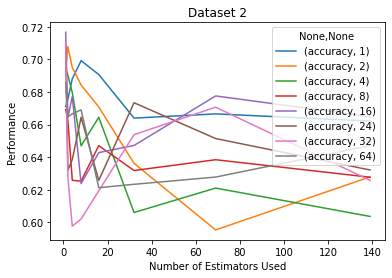

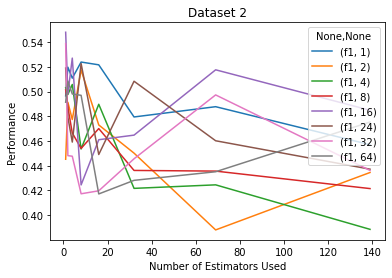

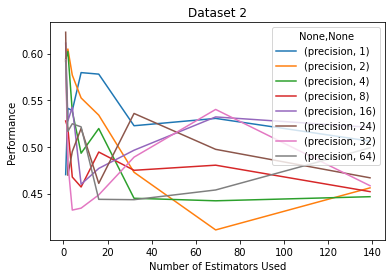

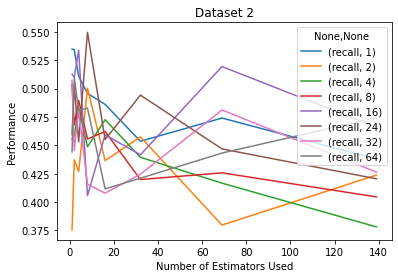

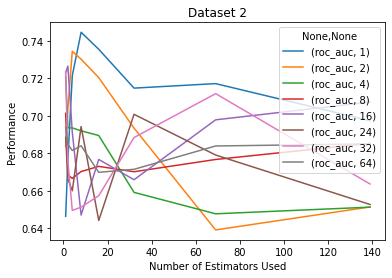

In [32]:
#Performance Plots with respect to different hyperparameters
import matplotlib.pyplot as plt
plt.close('all')


#Dataset 1 Performance Plots
for i in df_1_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Number of Estimators Used", ylabel="Performance", title="Dataset 1");

#Dataset 2 Performance Plots
for i in df_2_pd.groupby(level=0):
  i[1].T.iloc[:-1, :-1].plot(xlabel="Number of Estimators Used", ylabel="Performance", title="Dataset 2");

In [33]:
#Below is for the bias-variance tradeoff. As can be seen the performance on the training data
#tends to be much better than the performance on the testing data.

pd.set_option('display.max_columns', None)                                        #Displays all columns
df1_train_test_diff = df1_boost_results - df1_boost_train
df2_train_test_diff = df2_boost_results - df2_boost_train

#Dataset 1
df1_err_diff = np.transpose(df1_train_test_diff, (2,0,1))
df1_mean_err = np.mean(df1_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df1_err_pd = pd.concat([pd.DataFrame(np.vstack((df1_err_diff[0],df1_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[1],df1_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[2],df1_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df1_err_diff[3],df1_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df1_err_diff[4],df1_mean_err[4])), index=row_labels)],
                     keys=scoring)
df1_err_pd.columns = num_estimators_grid_1                                          #Adding a column for the mean difference in error across Neighbor Size
df1_err_pd["Mean Difference in Error"] = df1_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size


#Dataset 2
df2_err_diff = np.transpose(df2_train_test_diff, (2,0,1))
df2_mean_err = np.mean(df2_err_diff, axis=1)                                       #Adding a row for the mean difference in error across distance metrics
row_labels = max_depth_grid + ["Mean Difference in Error"]                   #Adding a row for the mean difference in error across distance metrics
df2_err_pd = pd.concat([pd.DataFrame(np.vstack((df2_err_diff[0],df2_mean_err[0])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[1],df2_mean_err[1])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[2],df2_mean_err[2])), index=row_labels), 
                     pd.DataFrame(np.vstack((df2_err_diff[3],df2_mean_err[3])), index=row_labels),
                     pd.DataFrame(np.vstack((df2_err_diff[4],df2_mean_err[4])), index=row_labels)],
                     keys=scoring)
df2_err_pd.columns = num_estimators_grid_2                                         #Adding a column for the mean difference in error across Neighbor Size
df2_err_pd["Mean Difference in Error"] = df2_err_pd.mean(axis=1)                   #Adding a column for the mean difference in error across Neighbor Size

df1_err_pd.loc[(scoring,"Mean Difference in Error"), df1_err_pd.columns].head()

,,1,2,4,8,16,32,85,171,Mean Difference in Error
f1,Mean Difference in Error,-0.046789,-0.068861,-0.076456,-0.065730,-0.057410,-0.048535,-0.041108,-0.039133,-0.055503
roc_auc,Mean Difference in Error,-0.025020,-0.025644,-0.021376,-0.013538,-0.009934,-0.007154,-0.006477,-0.004936,-0.014260
recall,Mean Difference in Error,-0.039526,-0.072252,-0.079619,-0.069813,-0.067846,-0.058019,-0.051679,-0.052730,-0.061436
accuracy,Mean Difference in Error,-0.031853,-0.049564,-0.054462,-0.048071,-0.041272,-0.034927,-0.029433,-0.028105,-0.039711
precision,Mean Difference in Error,-0.047624,-0.060322,-0.067736,-0.058412,-0.043547,-0.036197,-0.028219,-0.022847,-0.045613


In [34]:
df2_err_pd.loc[(scoring,"Mean Difference in Error"), df2_err_pd.columns].head()

,,1,2,4,8,16,32,69,139,Mean Difference in Error
f1,Mean Difference in Error,-0.119154,-0.206455,-0.322367,-0.421784,-0.462645,-0.491356,-0.507292,-0.530372,-0.382678
roc_auc,Mean Difference in Error,-0.118740,-0.186858,-0.244118,-0.269901,-0.289007,-0.299509,-0.306810,-0.318336,-0.254160
recall,Mean Difference in Error,-0.106143,-0.185571,-0.309751,-0.417812,-0.466893,-0.493654,-0.508090,-0.538000,-0.378239
accuracy,Mean Difference in Error,-0.071074,-0.138478,-0.216199,-0.281345,-0.303505,-0.322386,-0.332625,-0.345445,-0.251382
precision,Mean Difference in Error,-0.112861,-0.209651,-0.316757,-0.408519,-0.441553,-0.469506,-0.484699,-0.502448,-0.368249


<br><br><h2>Part II</h2>

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [ ]:
# mnist_loader.py
import pickle
import gzip
import numpy as np

def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MNISTDataset(Dataset):
    def __init__(self, images, labels=None, transform=None):
        self.X = images
        self.y = labels
        self.transforms = transform

    def __len__(self):
        return (len(self.X))

    def __getitem__(self, i):
        data = torch.tensor(self.X[i])
        data = data.reshape(1,28,28)

        if self.transforms:
            data = self.transforms(data)
            
        if self.y is not None:
            return (data, self.y[i])
        else:
            return data
    

In [ ]:
training_data, validation_data, test_data = load_data_wrapper() 
training_data = list(training_data)
test_data = list(test_data)
X_train = np.squeeze(np.array([i[0] for i in training_data]))
y_train = np.array([np.argmax(i[1]) for i in training_data])
X_test = np.squeeze(np.array([i[0] for i in test_data]))
y_test = np.array([i[1] for i in test_data])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform=transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])

train_loader = DataLoader(dataset=MNISTDataset(X_train, y_train, transform), batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=MNISTDataset(X_test, y_test, transform), batch_size=100, shuffle=False)

In [ ]:
# MLP
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, hidden_dim):
        super(Net, self).__init__()
        self.hidden_dim = hidden_dim
        self.layers = nn.Sequential(
            nn.Linear(784, self.hidden_dim[0]),
            nn.Sigmoid(),
            nn.Linear(self.hidden_dim[0], self.hidden_dim[1]),
            nn.Sigmoid(),
            nn.Linear(self.hidden_dim[1], 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.layers(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = Net(hidden_dim=[512, 256]).to(device)
print(model)

Net(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 30

In [ ]:
# train model on mnist data
for epoch in range(epochs):
    model.train()
    
    train_losses = []
    for i, (images, labels) in enumerate(train_loader):
        
        optimizer.zero_grad()
        
        outputs = model(images.to(device))
        loss = loss_fn(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        if (i * 100) % (100 * 100) == 0:
            print(f'{i * 100} / 50000')
            
    mean_train_losses.append(np.mean(train_losses))       
    print('epoch : {}, train loss : {:.4f}'\
         .format(epoch+1, np.mean(train_losses)))

0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 1, train loss : 0.6122
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 2, train loss : 0.2397
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 3, train loss : 0.1776
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 4, train loss : 0.1405
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 5, train loss : 0.1125
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 6, train loss : 0.0952
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 7, train loss : 0.0803
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 8, train loss : 0.0712
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 9, train loss : 0.0620
0 / 50000
10000 / 50000
20000 / 50000
30000 / 50000
40000 / 50000
epoch : 10, train loss : 0.0544
0 / 50000
10000 / 50000
20000

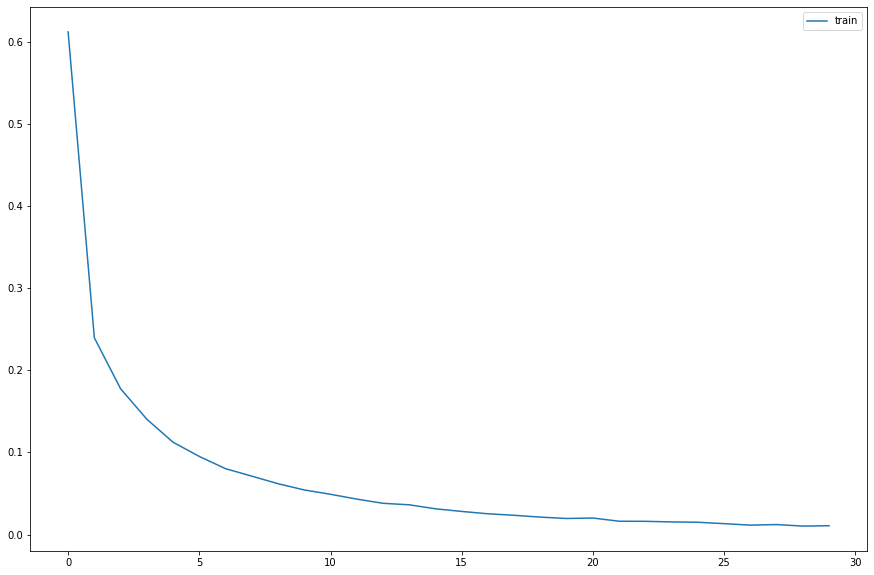

In [ ]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax1.plot(mean_train_losses, label='train')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

In [ ]:
def plot_images(batch, rows, cols, title = ""):
    plt.figure(figsize = (rows, cols))
    plt.axis("off")
    plt.title(title)
    plt.imshow(np.transpose(
        vutils.make_grid(batch[:(rows * cols)], nrow = rows, normalize = True).cpu(),
        (1, 2, 0)))


In [ ]:
model.eval()
test_preds = torch.LongTensor().to(device)
test_labels = torch.LongTensor().to(device)
correct = 0
total = 0

for i, (images, labels) in enumerate(test_loader):
    outputs = model(images.to(device))
    
    _, pred = outputs.max(1, keepdim=True)
    labels_ = torch.unsqueeze(labels.to(device), 1)
    test_labels = torch.cat((test_labels, labels_), dim=0)
    test_preds = torch.cat((test_preds, pred), dim=0)
    total += labels.size(0)
    correct += (torch.squeeze(pred) == labels.to(device)).sum().item()

print(test_preds)
print('Accuracy of the network on test images: %0.3f %%' % (
        100 * correct / total))

tensor([[7],
        [2],
        [1],
        ...,
        [4],
        [5],
        [6]], device='cuda:0')
Accuracy of the network on test images: 98.340 %


In [ ]:
import pandas as pd

out_df = pd.DataFrame()
out_df['ID'] = np.arange(1, len(X_test)+1)
out_df['pred'] = test_preds.cpu().numpy()
out_df['label'] = test_labels.cpu().numpy()

out_df.head()

,ID,pred,label
0,1,7,7
1,2,2,2
2,3,1,1
3,4,0,0
4,5,4,4


In [ ]:
out_df.to_csv('classification_result.csv', index=None)